In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import math

# Q2
Read `LineDetection.jpg` (the image below)




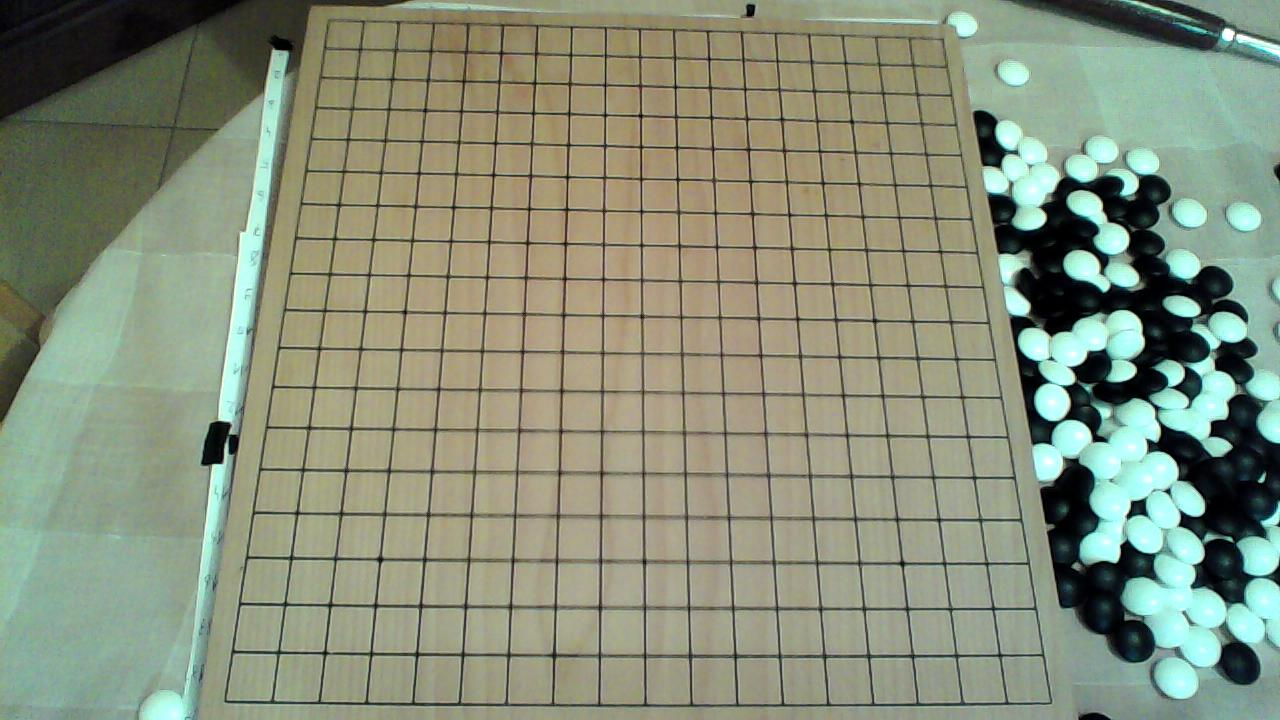

Use Hough to detect lines.

Note that you should consider the `Threshold`!

Here the threshold is `250`


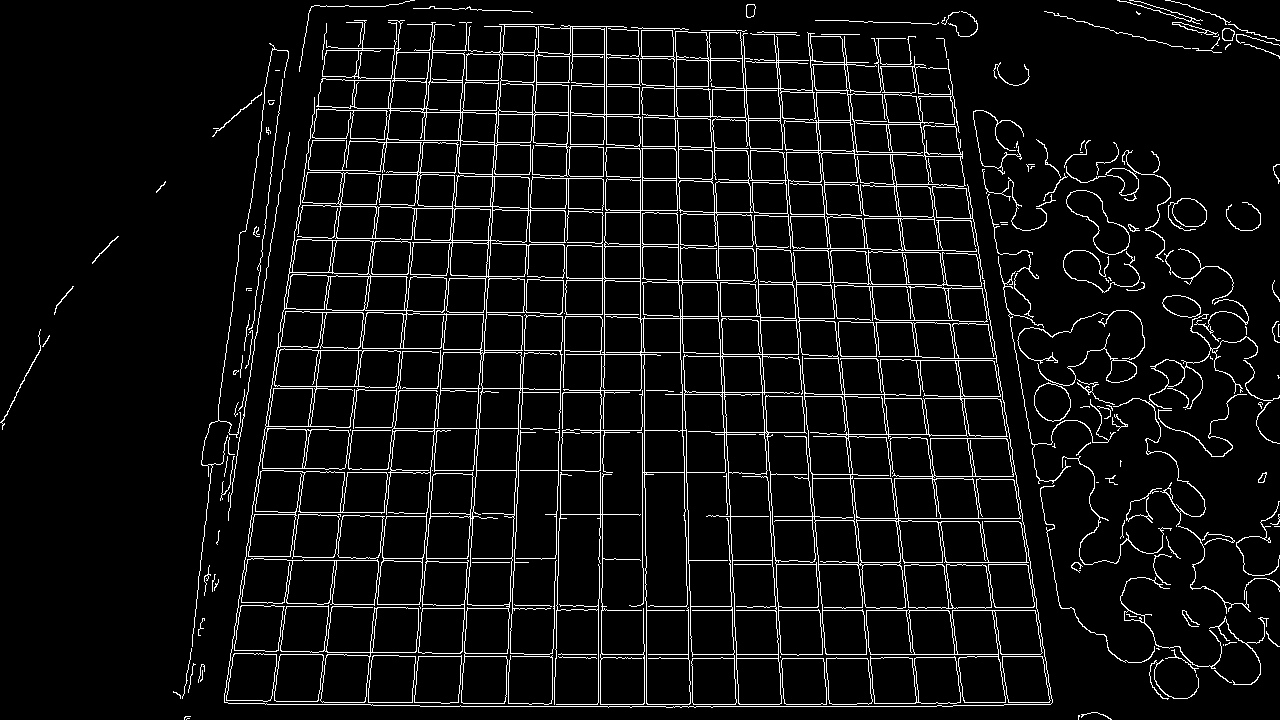

True

In [2]:
#TODO
img = cv2.imread('/content/LineDetection.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 150, 300)
cv2_imshow(edges)
cv2.imwrite("edge_detected.jpg", edges)

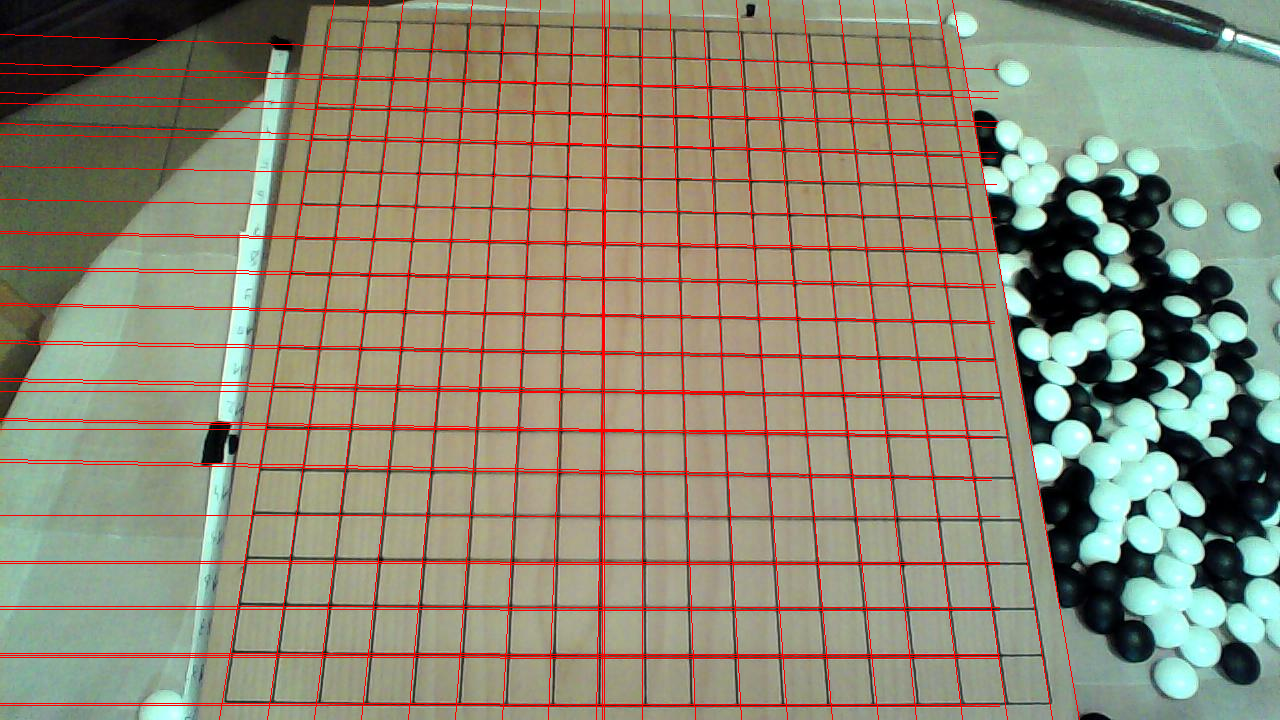

True

In [3]:
img1 = img.copy()
lines = cv2.HoughLines(edges, 1, np.pi / 180, 250)
# Draw detected lines
for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(img1, pt1, pt2, (0,0,255), 1)
# Show result
cv2_imshow(img1)
cv2.imwrite("hough_transform.jpg", img1)

Here is a sample output:

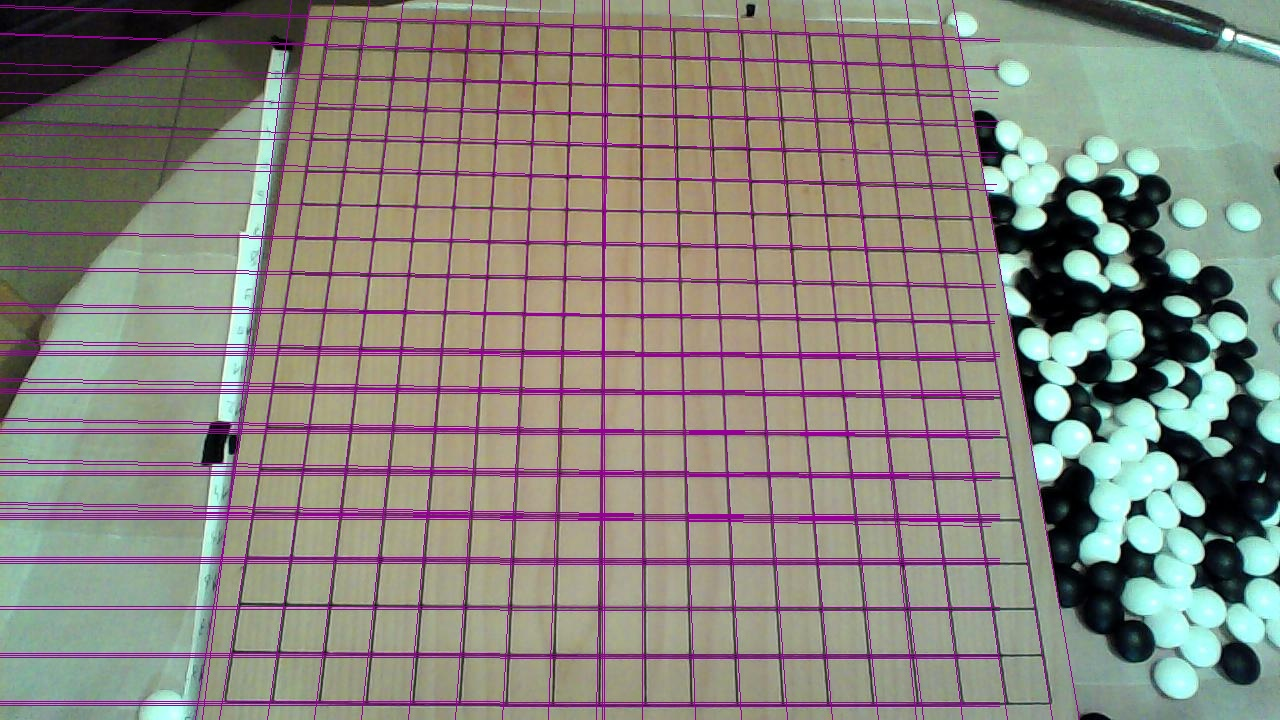

Now use *Probabilistic Hough Transform*. then, apply it to this picture.

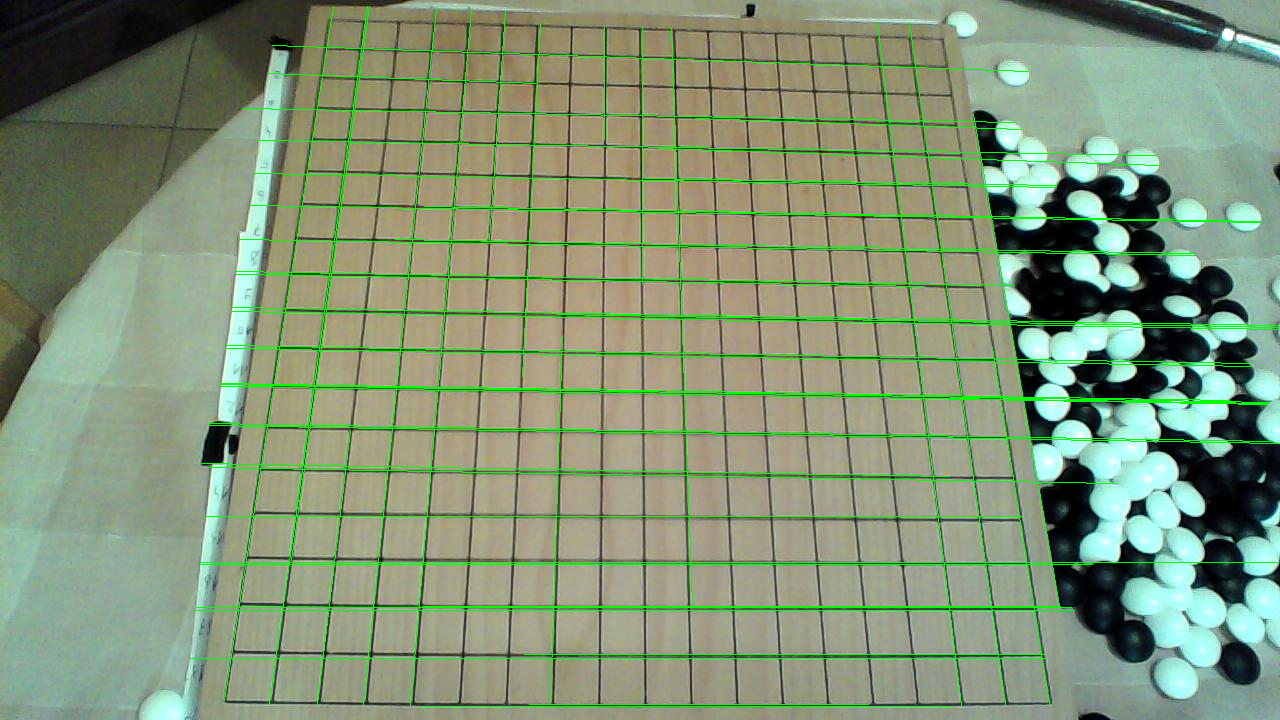

True

In [25]:
img2 = img.copy()
# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 250, minLineLength=5, maxLineGap=50)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img2, (x1, y1), (x2, y2), (0, 255, 0), 1)
cv2_imshow(img2)
cv2.imwrite("Phough_transform.jpg", img2)

Here is a sample output (Not the best one): 

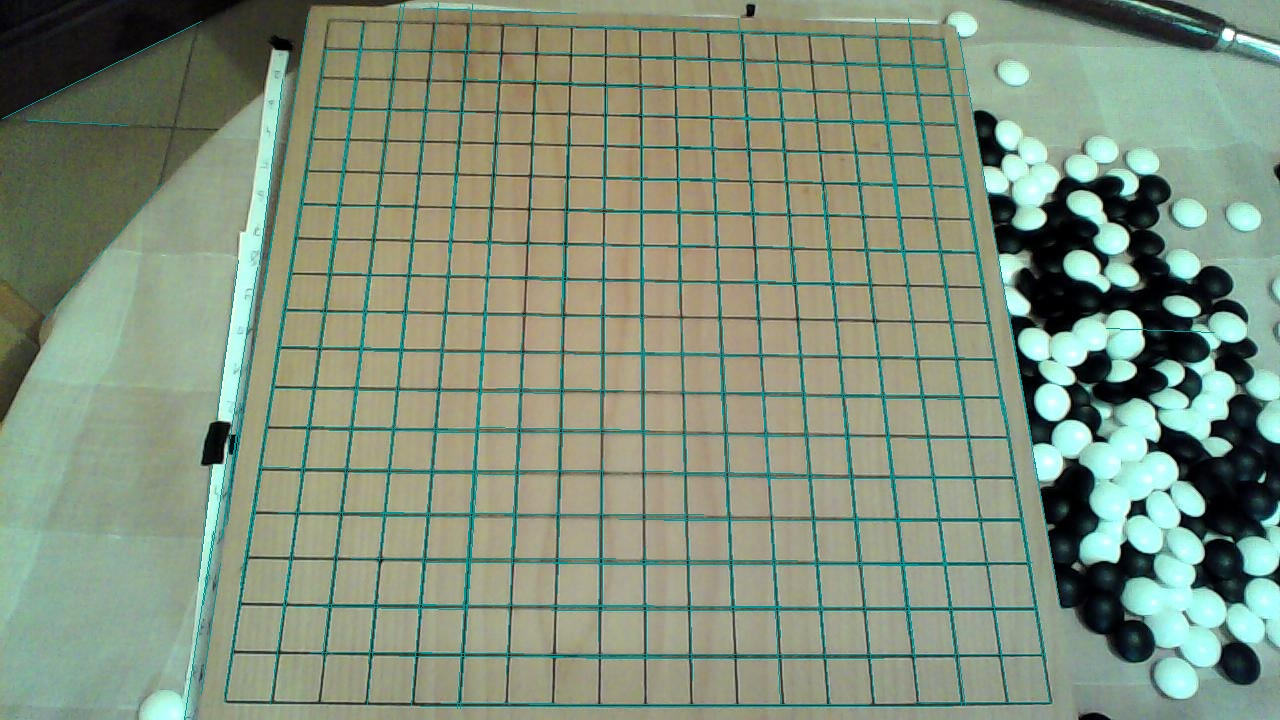

Note that you should find the optimum amount of parameters which are used in this algorithm.

# Q3

What does this cell of code do? Explain the algorithm.

Then Compare it with the results of the previous part.

In [26]:
img = cv2.imread("LineDetection.jpg",0)
imgcolorous = cv2.imread('LineDetection.jpg')
UNKNOWN = cv2.createLineSegmentDetector(0)
lines = UNKNOWN.detect(img)[0]
drawn_img = UNKNOWN.drawSegments(imgcolorous,lines)
cv2.imwrite('UNKNOWN.jpg',drawn_img)

True

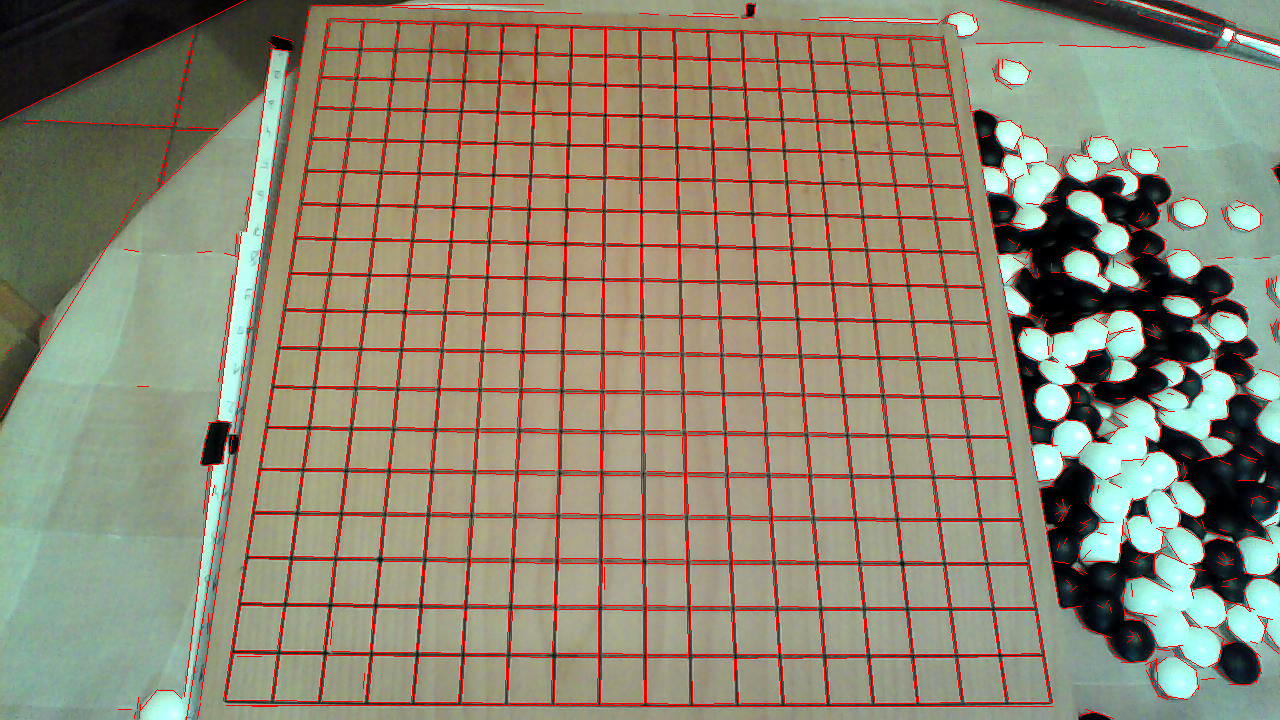

In [27]:
cv2_imshow(drawn_img)

# Q4

In the cells below you should define two functions that one of them covert RGB to CMYK and another one Convert them vice versa. 

In [44]:
def rgb_to_cmyk(r, g, b, RGB_SCALE = 255, CMYK_SCALE = 100):

  #TODO
  scaled_r = r / RGB_SCALE
  scaled_g = g / RGB_SCALE
  scaled_b = b / RGB_SCALE

  k = 1 - max(scaled_r, scaled_g, scaled_b)
  c = 1 - k - scaled_r
  m = 1 - k - scaled_g
  y = 1 - k - scaled_b

  c = c / ( 1 - k )
  m = m / ( 1 - k )
  y = y / ( 1 - k )

  return int(c * CMYK_SCALE), int(m * CMYK_SCALE), int(y * CMYK_SCALE), int(k * CMYK_SCALE)

In [45]:
rgb_to_cmyk(25, 56, 25)

(55, 0, 55, 78)

Expected Output: (55, 0, 55, 78)

In [52]:
def cmyk_to_rgb(c, m, y, k, CMYK_SCALE = 100, RGB_SCALE = 255):

  #TODO
  r = int(RGB_SCALE * (1 - c / CMYK_SCALE) * (1 - k / CMYK_SCALE))
  g = int(RGB_SCALE * (1 - m / CMYK_SCALE) * (1 - k / CMYK_SCALE))
  b = int(RGB_SCALE * (1 - y / CMYK_SCALE) * (1 - k / CMYK_SCALE))

  return r, g, b

In [53]:
cmyk_to_rgb(55, 0, 55, 78)

(25, 56, 25)

Expected Output: (25, 56, 25)

# Q5
Compute the HSI parametes and V, L and Y according to lectures.

In [64]:
def transform_rgb(r, g, b, RGB_SCALE = 255):

    r = r / RGB_SCALE
    g = g / RGB_SCALE
    b = b / RGB_SCALE

    I = (r + g + b) / 3

    theta = math.acos(((r - g) + (r - b)) / (2 * (math.sqrt((math.pow(r - g, 2) + (r - b)*(g - b))))))
    theta = theta * 255 / 360
    H = theta if b <= g else 360 - theta 

    S = 1 - ((3 * min(r, g, b)) / (r + g + b))

    V = max(r, g, b)
    L = (max(r, g, b) + min(r, g, b)) / 2 

    return I * 100, H, S * 100, V * 100, L * 100

In [66]:
#TODO 
I, H, S, V, L = transform_rgb(150 , 65, 200)
print("I : ", I)
print("H : ", H)
print("S : ", S)
print("V : ", V)
print("L : ", L)

I :  54.248366013071895
H :  358.99259698317417
S :  53.01204819277109
V :  78.43137254901961
L :  51.96078431372548


# Good Luck!